In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix, plot_roc_curve, roc_auc_score,auc

In [96]:
url='/content/drive/MyDrive/creditcard.csv'
dataset = pd.read_csv(url)

In [97]:
print("Dataset Shape :-",dataset.shape) 

Dataset Shape :- (284807, 31)


In [98]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [194]:
dataset.isna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [100]:
print("Unique values of target variable :- ",dataset['Class'].unique())

Unique values of target variable :-  [0 1]


In [101]:
print("Number of samples under each target value:")
print(dataset['Class'].value_counts())

Number of samples under each target value:
0    284315
1       492
Name: Class, dtype: int64


In [102]:
fraud_indices = np.array(dataset[dataset.Class == 1].index)
number_records_fraud = len(fraud_indices)
print("No. of fraud transactions:")
print(number_records_fraud)

No. of fraud transactions:
492


In [103]:
normal_indices = dataset[dataset.Class == 0].index
print("No. of Normal transactions:")
len(normal_indices)

No. of Normal transactions:


284315

#Data Pre-processing

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset['normalizedAmount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
dataset = dataset.drop(['Amount'], axis = 1)

dataset = dataset.drop(['Time'], axis = 1)

dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#Splitting dataset to train & test dataset

In [105]:
X = dataset.iloc[:, dataset.columns != 'Class'].values
y = dataset.iloc[:, dataset.columns == 'Class'].values    # Response variable determining if fraudulent or not

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [106]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#Decision tree Classifier

In [189]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train.ravel())
y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9155405405405406

Confusion matrix, without normalization
[[138  10]
 [ 15 133]]


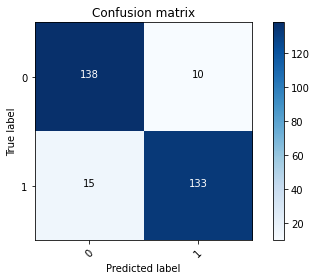

In [190]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [191]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9155 	precision:0.9301 	recall:0.8986 	F1-score:0.9141


Confusion matrix, without normalization
[[260429  23886]
 [    15    477]]


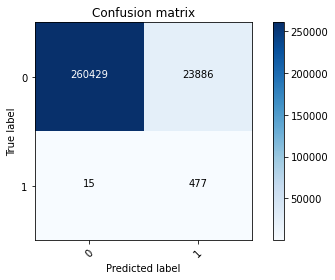

In [192]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [193]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
### Store results in dataframe for comparing various Models
results_fullset = pd.DataFrame([['Decision Tree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.91608,0.030488,0.969512,0.019579,0.038383


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


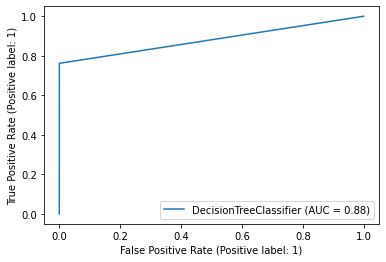

In [117]:
ROC_DT = plot_roc_curve(decision_tree, X_test, y_test)
plt.show()

#Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.ravel())
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9994967405170698

Confusion matrix, without normalization
[[85289     7]
 [   36   111]]


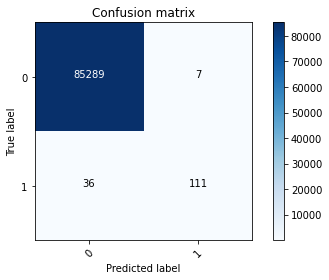

In [118]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [119]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9995 	precision:0.9407 	recall:0.7551 	F1-score:0.8377


Confusion matrix, without normalization
[[284308      7]
 [    36    456]]


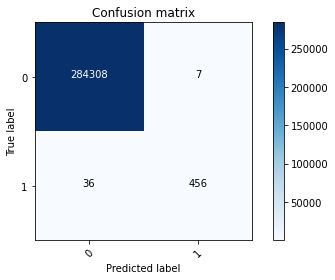

In [120]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [121]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
model_results = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.999782,0.071138,0.928862,0.944215,0.936475
1,RandomForest,0.999849,0.073171,0.926829,0.984881,0.954974


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


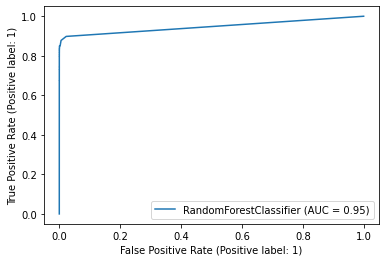

In [122]:
ROC_RF = plot_roc_curve(random_forest, X_test, y_test)
plt.show()

#Naive Bayes

In [123]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y4= gnb.predict(X_test)
gnb.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9784066570696254

Confusion matrix, without normalization
[[83475  1821]
 [   24   123]]


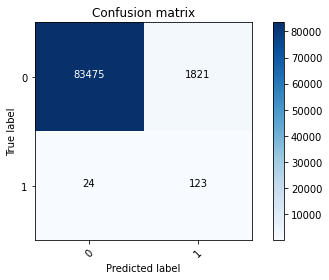

In [124]:
# Confusion matrix on the test dataset
cnf_m = confusion_matrix(y_test,y4)
plot_confusion_matrix(cnf_m,classes=[0,1])

In [125]:
acc6 = accuracy_score(y_test, y4)
prec6 = precision_score(y_test, y4)
rec6 = recall_score(y_test, y4)
f16 = f1_score(y_test, y4)
print('accuracy:%0.4f'%acc6,'\tprecision:%0.4f'%prec6,'\trecall:%0.4f'%rec6,'\tF1-score:%0.4f'%f16)

accuracy:0.9784 	precision:0.0633 	recall:0.8367 	F1-score:0.1176


Confusion matrix, without normalization
[[278108   6207]
 [    84    408]]


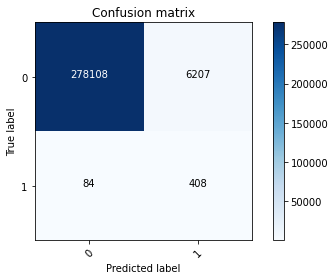

In [126]:
# Confusion matrix on the whole dataset
y4= gnb.predict(X)
cnf_m = confusion_matrix(y,y4.round())
plot_confusion_matrix(cnf_m,classes=[0,1])

In [127]:
acc = accuracy_score(y, y4)
prec = precision_score(y, y4)
rec = recall_score(y, y4)
f1 = f1_score(y, y4)

model_results = pd.DataFrame([['Naive Bayes', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.999782,0.071138,0.928862,0.944215,0.936475
1,RandomForest,0.999849,0.073171,0.926829,0.984881,0.954974
2,Naive Bayes,0.977911,0.170732,0.829268,0.061678,0.114816


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


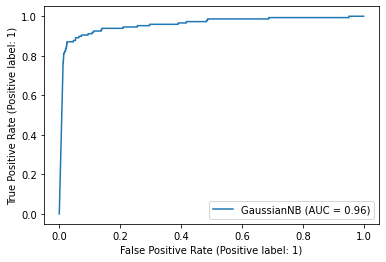

In [128]:
ROC_RF = plot_roc_curve(gnb, X_test, y_test)
plt.show()

#Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.999204147794436

Confusion matrix, without normalization
[[85284    12]
 [   56    91]]


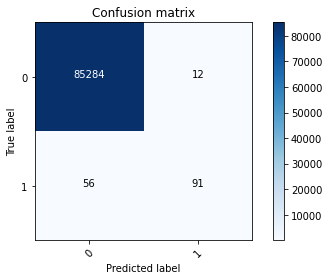

In [130]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [131]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc6,'\tprecision:%0.4f'%prec6,'\trecall:%0.4f'%rec6,'\tF1-score:%0.4f'%f16)

accuracy:0.9784 	precision:0.0633 	recall:0.8367 	F1-score:0.1176


Confusion matrix, without normalization
[[284288     27]
 [    35    457]]


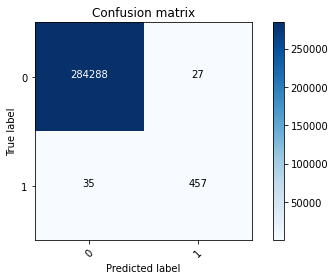

In [132]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [133]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
model_results = pd.DataFrame([['Logistic Regression', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.999782,0.071138,0.928862,0.944215,0.936475
1,RandomForest,0.999849,0.073171,0.926829,0.984881,0.954974
2,Naive Bayes,0.977911,0.170732,0.829268,0.061678,0.114816
3,Logistic Regression,0.999782,0.071138,0.928862,0.944215,0.936475


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


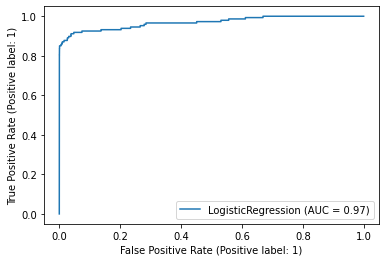

In [134]:
ROC_DT = plot_roc_curve(lr, X_test, y_test)
plt.show()

In [155]:
print("                           Result of Before UnderSampling Dataset  ")
results_fullset

                           Result of Before UnderSampling Dataset  


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.999782,0.071138,0.928862,0.944215,0.936475
1,RandomForest,0.999849,0.073171,0.926829,0.984881,0.954974
2,Naive Bayes,0.977911,0.170732,0.829268,0.061678,0.114816
3,Logistic Regression,0.999782,0.071138,0.928862,0.944215,0.936475


#Undersampling 

In [136]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [167]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_undersample, y_undersample = rus.fit_resample(X, y)
print('original dataset shape:', len(y))
print('Resample dataset shape', len(y_rus))

original dataset shape: 284807
Resample dataset shape 984


In [137]:
#under_sample_data = dataset.iloc[under_sample_indices,:]
#X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
#y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [169]:
decision_tree.fit(X_train, y_train.ravel())
y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9155405405405406

In [170]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_fullsetun = pd.DataFrame([['Decision Tree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullsetun

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.915541,0.094595,0.905405,0.924138,0.914676


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


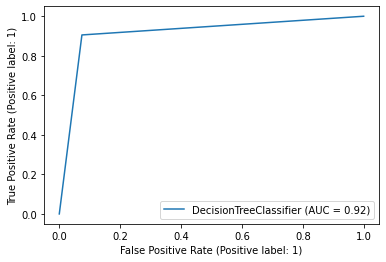

In [171]:
ROC_DT = plot_roc_curve(decision_tree, X_test, y_test)
plt.show()

In [176]:
random_forest.fit(X_train,y_train.ravel()) 
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9256756756756757

In [177]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_resultsun = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullsetun = results_fullsetun.append(model_resultsun, ignore_index = True)
results_fullsetun

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.915541,0.094595,0.905405,0.924138,0.914676
1,RandomForest,0.925676,0.114865,0.885135,0.963235,0.922535


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


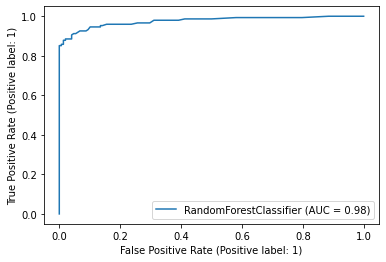

In [178]:
ROC_RF = plot_roc_curve(random_forest, X_test, y_test)
plt.show()

In [179]:
gnb.fit(X_train, y_train)
y4= gnb.predict(X_test)
gnb.score(X_test,y_test)

0.9054054054054054

In [180]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_resultsun = pd.DataFrame([['Naive Bayes', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullsetun = results_fullsetun.append(model_resultsun, ignore_index = True)
results_fullsetun

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.915541,0.094595,0.905405,0.924138,0.914676
1,RandomForest,0.925676,0.114865,0.885135,0.963235,0.922535
2,Naive Bayes,0.925676,0.114865,0.885135,0.963235,0.922535


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


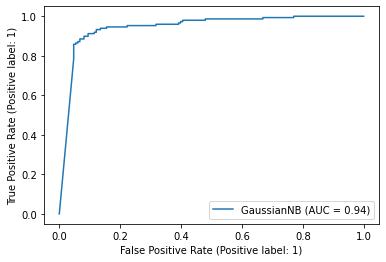

In [181]:
ROC_RF = plot_roc_curve(gnb, X_test, y_test)
plt.show()

In [182]:
lr.fit(X_train, y_train.ravel())
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.9391891891891891

In [183]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_resultsun = pd.DataFrame([['Logistic Regression', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullsetun = results_fullsetun.append(model_resultsun, ignore_index = True)
results_fullsetun

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.915541,0.094595,0.905405,0.924138,0.914676
1,RandomForest,0.925676,0.114865,0.885135,0.963235,0.922535
2,Naive Bayes,0.925676,0.114865,0.885135,0.963235,0.922535
3,Logistic Regression,0.939189,0.081081,0.918919,0.957746,0.937931


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


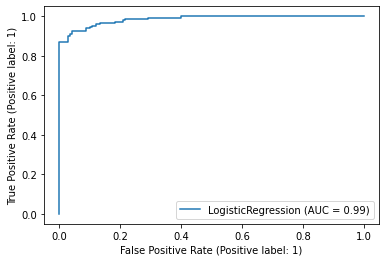

In [184]:
ROC_DT = plot_roc_curve(lr, X_test, y_test)
plt.show()

In [185]:
print("                           Result After Undersampling  ")
results_fullsetun

                           Result After Undersampling  


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.915541,0.094595,0.905405,0.924138,0.914676
1,RandomForest,0.925676,0.114865,0.885135,0.963235,0.922535
2,Naive Bayes,0.925676,0.114865,0.885135,0.963235,0.922535
3,Logistic Regression,0.939189,0.081081,0.918919,0.957746,0.937931
